In [1]:

### Create borders on the little cirkels , instead of all the same color, dark outlines to point
### Check how Benjamin did the fill/reason_fill or something
### Maybe look into color scheme
### Create contours on the plot, using sampling
### Copulas mathematical description of depende between random variables 
### Can use hydraulic or structural dataset to see if emperical stuff works

In [2]:
# Import local classes
import sys
sys.path.append(r'../../src/')
import bivariate.class_copula

# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyvinecopulib as cop
import scipy.stats as st

## Using Copula class for a Bivariate Distribution

In [3]:
# Create distributions for 2 random variables, X1 and X2
X1 = st.norm(0,1)           # Normal distribution with mean 0 and standard deviation 1
X2 = st.gumbel_r(0,1)       # Gumbel distribution with location 0 and scale 1


# Create a copula object
Copula_12 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.6])


In [4]:
# Define a bivariate copula object
bivariate_copula_object = bivariate.class_copula.Bivariate([X1,X2], Copula_12)

In [5]:
# Generate random samples from the bivariate copula object
gen_random_samples = bivariate_copula_object.random_samples(10000)

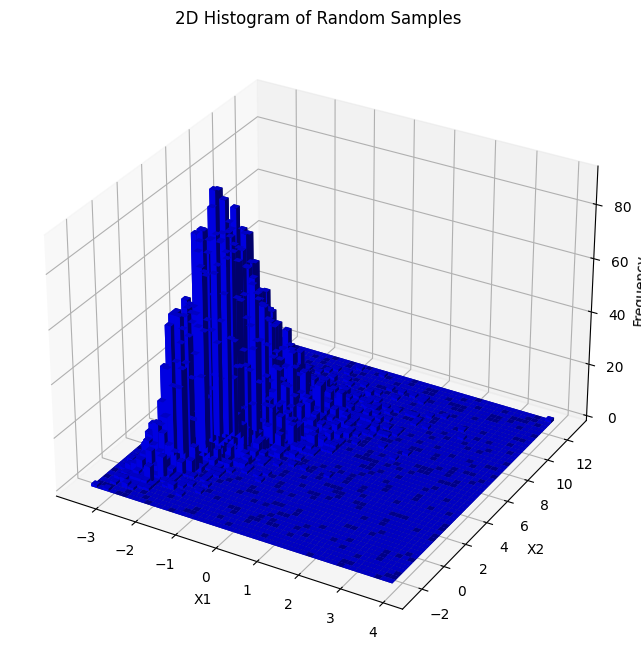

In [6]:
# Plot a 2D histogram of the random samples
bivariate_copula_object.plot_histogram_2D();

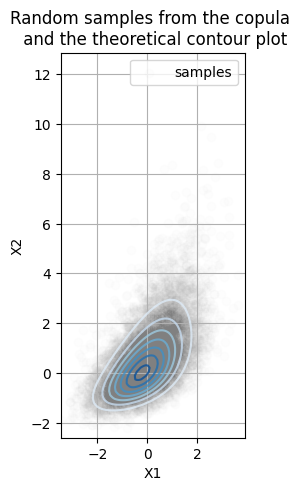

In [7]:
# Plot the random samples
bivariate_copula_object.plot_random_samples();

## 2. Region of interest defined by a function

#### Arbitrary function

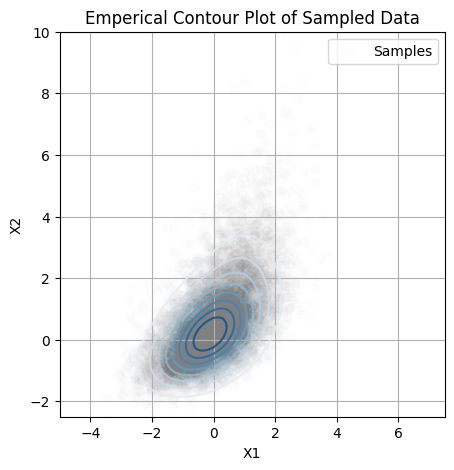

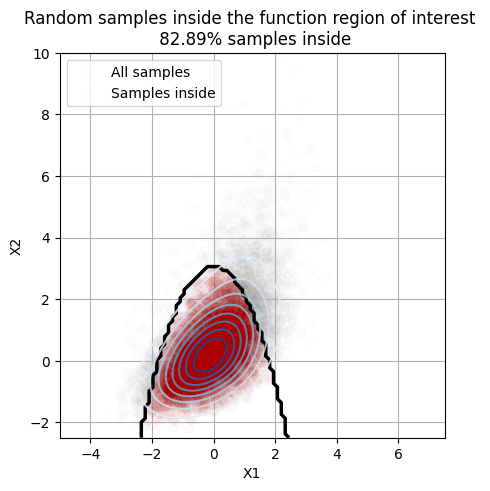

In [8]:
# Create a function
def arbitrary_function(X1,X2):
    function = (X1**2 + X2-3 <= 0)
    return function

# Define a 2D region of interest object and insert the random samples and the function
region_2 = bivariate.class_copula.Region_of_interest(function=arbitrary_function ,random_samples=gen_random_samples)


# Run the function needed to check if the points are inside the region of interest
region_2.inside_function()

# Plot the emperical contours of the random samples
region_2.plot_emperical_contours(xy_lim=[-5, 7.5, -2.5, 10])

# Plot the points inside the region of interest
region_2.plot_inside_function(xy_lim=[-5, 7.5, -2.5, 10]);

#### Rectangular region

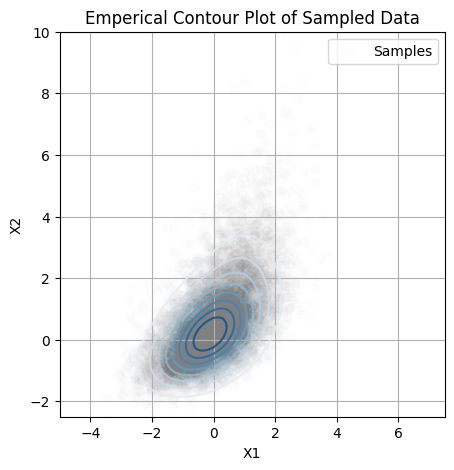

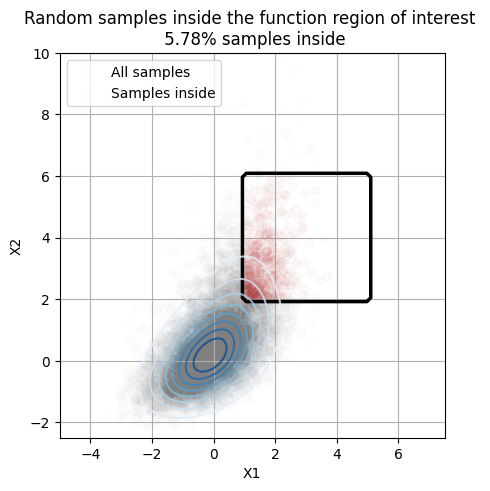

In [9]:
# Define a rectangular region of interest
def points_inside_rectangle(X1, X2):
    func = (1 <= X1) & (X1 <= 5) & (2 <= X2)  &  (X2 <= 6)
    return  func

# Define a 2D region of interest object and insert the random samples and the function
region_2 = bivariate.class_copula.Region_of_interest(function=points_inside_rectangle , random_samples=gen_random_samples)

# Run the function needed to check if the points are inside the region of interest
region_2.inside_function()

# Plot the emperical contours of the random samples
region_2.plot_emperical_contours(xy_lim=[-5, 7.5, -2.5, 10])

# Plot the points inside the region of interest
region_2.plot_inside_function(xy_lim=[-5, 7.5, -2.5, 10]);

#### Triangle

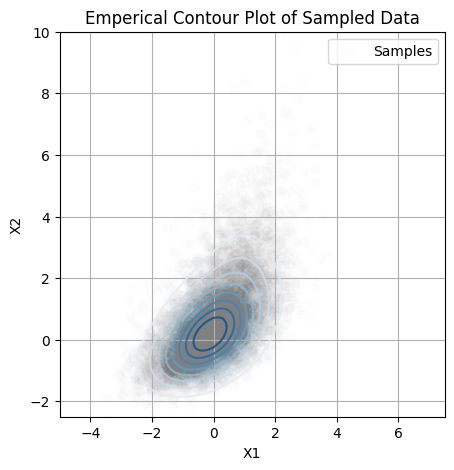

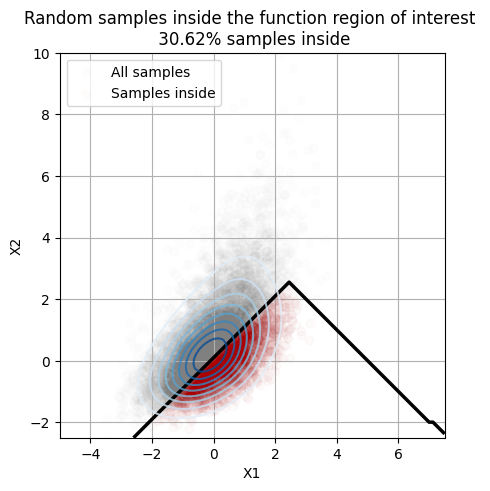

In [10]:
# Define a triangular region of interest
def points_inside_triangle(X1, X2):
    func = (X2 <= X1) & (X2 <= 5-X1)
    return  func

# Define a 2D region of interest object and insert the random samples and the function
region_2 = bivariate.class_copula.Region_of_interest(function=points_inside_triangle, random_samples=gen_random_samples)

# Run the function needed to check if the points are inside the region of interest
region_2.inside_function()

# Plot the emperical contours of the random samples
region_2.plot_emperical_contours(xy_lim=[-5, 7.5, -2.5, 10])

# Plot the points inside the region of interest
region_2.plot_inside_function(xy_lim=[-5, 7.5, -2.5, 10]);

# Multivariate distributions, also sampling with copulas

In [11]:
# Create distributions for 3 random variables, X1, X2, X3
X1 = st.norm(0,1)           # Normal distribution with mean 0 and standard deviation 1
X2 = st.gumbel_r(0,1)       # Gumbel distribution with location 0 and scale 1
X3 = st.uniform(0,1)        # Uniform distribution between 0 and 1

# Create the copula objects
Copula_12 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.7])
Copulal_23 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.5])

# Define conditional copula object
Cond_Copula_13_2 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.8])

In [12]:
# Define the Multivariate object
multi_object = bivariate.class_copula.Multivariate(rv_array=[X1,X2,X3],
                                                   copulas_array=[Copula_12, Copulal_23],
                                                   conditional_copulas=[Cond_Copula_13_2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


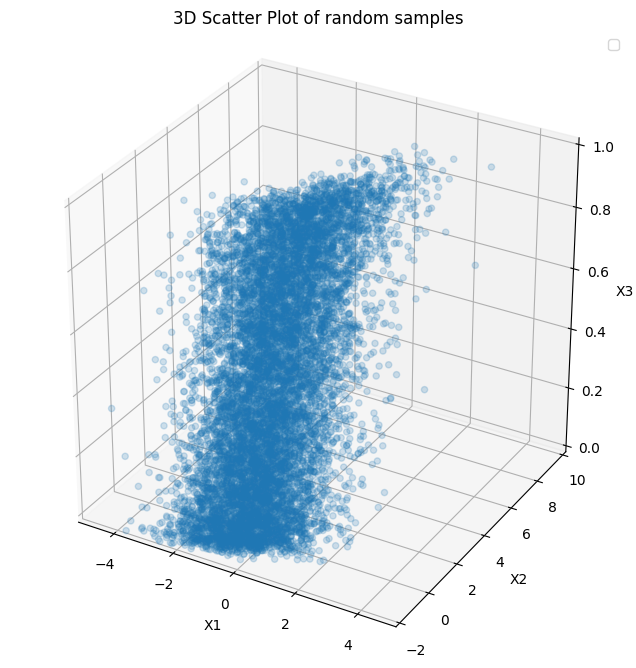

In [13]:
# Generate random samples from the multivariate object
gen_random_samples_multi = multi_object.random_samples_3D(10000)

# Plot the random samples
multi_object.plot_random_samples_3D(xyz_lim=[-5, 5, -2, 10, 0, 1]);

## Defining regions of interest for a 3D case

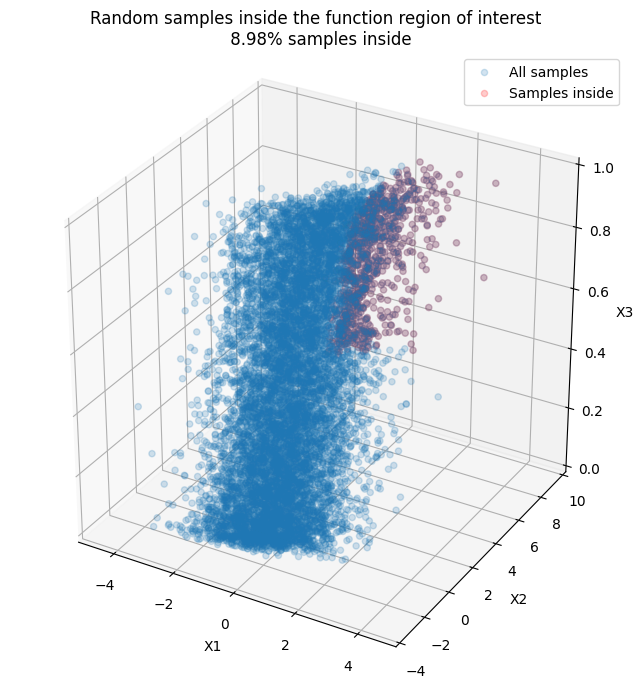

In [14]:
# Define a function
def boundary_function(X1, X2, X3):
    func = (1 <= X1) & (X1 <= 5) & (0.6 <= X3) 
    return func

# Define a 3D region of interest object and insert the random samples and the function
region_3D = bivariate.class_copula.Region_of_interest_3D(function=boundary_function, random_samples=gen_random_samples_multi)

# Check if the points are inside the region of interest
region_3D.inside_function_3d()

# Plot the all the points and the ones inside the region of interest
region_3D.plot_inside_function_3d(xyz_lim=[-5, 5, -4, 10, 0, 1]); 

In [15]:
import scipy.stats as st

distribution_mapping = {
            'lognormal': st.lognorm,
            'gumbel': st.gumbel_r,
            'exponential': st.expon,
            'weibull': st.weibull_min,
            'normal': st.norm,
            'gamma': st.gamma
            # Add more distributions if needed
        }

distribution_options = list(distribution_mapping.keys())
print(distribution_options)

['lognormal', 'gumbel', 'exponential', 'weibull', 'normal', 'gamma']


In [16]:
import ipywidgets as widgets
from IPython.display import display



def add_variable(button):
    variable_name = variable_name_text.value
    distribution = distribution_dropdown.value
    location = location_text.value
    scale = scale_text.value
    rv_object = distribution_mapping[distribution](loc = location, scale = scale)
    variables[variable_name] = {'distribution': distribution, 'location': location, 'scale': scale, 
                                'RV': distribution_mapping[distribution](location, scale)}
    print("Variable added:", variables)

variables = {}

# Variable Name
variable_name_text = widgets.Dropdown(description="RV:", options=["X1", "X2", "X3"])

# Distribution Type
distribution_dropdown = widgets.Dropdown(description="Distribution:", options=distribution_options)

# Location
location_text = widgets.FloatText(description="Location:")

# Scale
scale_text = widgets.FloatText(description="Scale:")

# Add Button
add_button = widgets.Button(description="Add Variable")
add_button.on_click(add_variable)

# Arrange widgets
widgets.VBox([variable_name_text, distribution_dropdown, location_text, scale_text, add_button])


In [17]:
# Loop over this dictionary 
for variable_name, variable_details in variables.items():
    print(f"RV = {variable_name}, distribution = {variable_details['distribution']}, location = {variable_details['location']}, scale = {variable_details['scale']}")
